In [9]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import datetime as dt
import math


def predict(column, ylabel):
  data = pd.read_csv('https://raw.githubusercontent.com/sahdan96/covid19/main/covid_data.csv')
  data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')
  data = data[['Date', column]]
  data = data.rename(columns = {"Date":"ds", column:"y"})
  df = data[:-3]
  future = data[-3:]

  train_len = math.ceil(len(df))
  train = df[:train_len]
  test = df[train_len:]

  from fbprophet import Prophet as pp

  m = pp(daily_seasonality=True)
  m.fit(train)

  future = m.make_future_dataframe(periods=200) #we need to specify the number of days in future
  prediction = m.predict(future)
  m.plot(prediction)
  plt.title("Prediction of the covid 19 using the Prophet")
  plt.xlabel("Date")
  plt.ylabel(ylabel)
  plt.legend(["actual", "forecast"])
  plt.show()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


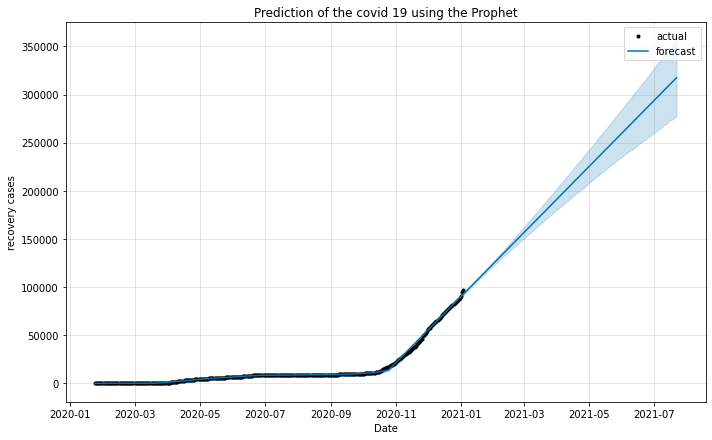

In [10]:
predict("discharged", "recovery cases")

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


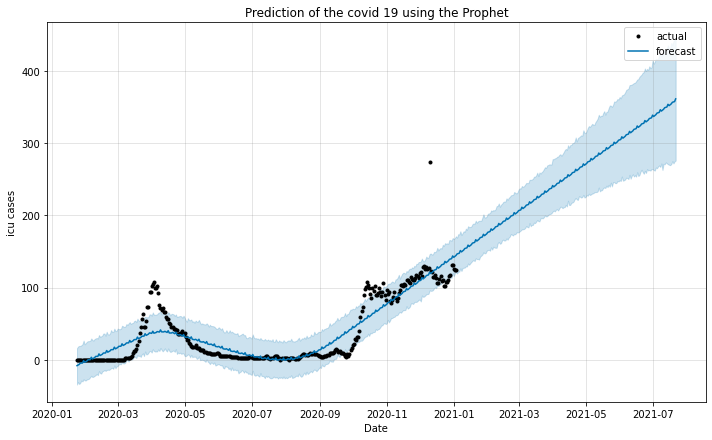

In [11]:
predict("icu", "icu cases")